<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Logistic-Regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Import the libraries

In [3]:
# Imports the NumPy library, which is a popular numerical computing library in Python
import numpy as np

# Imports the pyplot module of the matplotlib library in Python used for data visualization
import matplotlib.pyplot as plt

# Imports the Pandas library in Python using, which provides data structures and functions for data manipulation and analysis
import pandas as pd

## Import the dataset

In [4]:
# Use read_csv() method to read the contents of the CSV file and convert it into a DataFrame object
dataset = pd.read_csv('data.csv')

# Selects all rows and the columns from the third to the last column up to the last column (excluding the last column itself)
# Select the columns: Loan Amount and Saving Account Balance
X = dataset.iloc[:, -3:-1].values

# Select the last column from the dataset
y = dataset.iloc[:, -1].values

In [5]:
# Print the first 5 elements of the matrix X
print(X[:5, -2:])

[[ 3944  5756]
 [ 2726 18420]
 [ 2536  3552]
 [ 4328 10966]
 [ 1499  5263]]


In [6]:
# Print the first 5 elements of the matrix Y
print(y[:5,])

['Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected']


## Splitting the dataset into the Training set and Test set

In [7]:
# Imports train_test_split function from model_selection module of the scikit-learn library
from sklearn.model_selection import train_test_split

# Splits the dataset into a training set and a testing set using train_test_split function from scikit-learn
# 80% train and 20% test
# The 'random_state' parameter is set to 0, which means that the split will be deterministic and the same split 
# will be obtained every time the code is run. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [8]:
# Imports the StandardScaler class from the scikit-learn library in Python, which is used for standardizing 
# (scaling) the features of a dataset by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Creates an instance of the StandardScaler class from scikit-learn, which can be used to scale the features 
# of a dataset to have zero mean and unit variance.
sc = StandardScaler()

# Applies fit_transform method of the StandardScaler to the training set X_train, 
# which scales the features of the dataset to have zero mean and unit variance based on the training set statistics.
X_train = sc.fit_transform(X_train)

# Applies fit_transform method of the StandardScaler to the training set X_test
X_test = sc.transform(X_test)

In [9]:
# Print the first 5 elements of the matrix X_train
print(X_train[:5, -2:])

[[ 0.59207175  1.41150269]
 [-0.0052144  -0.54824525]
 [ 0.90579782 -0.88503813]
 [ 0.9351019   0.31102885]
 [-1.28166577  1.62077894]]


In [10]:
# Print the first 5 elements of the matrix X_test
print(X_test[:5, -2:])

[[ 0.41538537 -1.03543327]
 [ 0.8049573   0.51338834]
 [ 1.4281     -1.71096991]
 [-0.79211521  1.32566396]
 [-0.51114077  1.02434163]]


## Training the Logistic Regression model on the Training set

In [11]:
# Imports the LogisticRegression class from the scikit-learn linear_model module, 
# which allows the user to build a logistic regression model for binary classification.
from sklearn.linear_model import LogisticRegression

# Creates an instance of the LogisticRegression class with a specified random state
classifier = LogisticRegression(random_state = 0)

# Fits the logistic regression model represented by the classifier object to the training data, 
# X_train and y_train, so that the model can learn to make predictions on new data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [12]:
# Applies the trained logistic regression classifier to predict the binary class label of a new sample 
# represented by the input features [4648, 4719] that has been standardized using the same scaling applied to the training data
print(classifier.predict(sc.transform([[4648,4719]])))

['Rejected']


In [27]:
# Print the first 5 records with approved status
dataset[dataset['approval_status'] == 'Approved'].head().T

,8,16,17,31,33
credit_history,Good,Good,Good,Good,Good
employment_status,Unemployed,Employed,Unemployed,Self-Employed,Employed
collateral,Investment,Other,Car,House,Other
payment_history,Fair,Excellent,Fair,Good,Poor
type_of_credit_accounts,Auto,Mortgage,Mortgage,Auto,Auto
public_records_and_collections,Tax Lien,Collection,Tax Lien,None,Bankruptcy
purpose_of_loan,Car Financing,Business,Car Financing,Business,Home Improvement
income,18858,38036,23060,28890,40631
assets_value,38093,30118,24912,26963,38339
debt_to_income_ratio,19,31,74,16,35


In [25]:
# Test 5 records with Approved:

# Test No.1
print(classifier.predict(sc.transform([[4311,19346]])))


['Rejected']


In [13]:
# Applies the trained logistic regression classifier to predict the binary class labels of the test set X_test, 
# and stores the predicted labels in the y_pred variable.
y_pred = classifier.predict(X_test)

# Concatenates the predicted and actual binary class labels for the test set into a single two-dimensional NumPy array, 
# and then prints the resulting array to the console.
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Approved']
 ['Rejected' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Approved']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']
 ['Rejected' 'Rejected']


## Making the Confusion Matrix

In [14]:
# Imports the confusion_matrix function from the scikit-learn metrics module, 
# which can be used to compute the confusion matrix of a classifier's predictions.
from sklearn.metrics import confusion_matrix

# Applies the confusion_matrix function to compute the confusion matrix of a classifier's predictions 
# by comparing the predicted binary class labels (y_pred) to the actual binary class labels (y_test) for the test set.
cm = confusion_matrix(y_test, y_pred)

# Prints the confusion matrix
print(cm)

[[ 0  8]
 [ 0 92]]


In [15]:
# Imports the accuracy_score function from the scikit-learn metrics module, 
# which can be used to compute the accuracy of a classifier's predictions by comparing 
# the predicted binary class labels to the actual binary class labels for a set of data.
from sklearn.metrics import accuracy_score

# Applies the accuracy_score function to compute the accuracy of a classifier's predictions 
# by comparing the predicted binary class labels (y_pred) to the actual binary class labels (y_test) for the test set.
accuracy_score(y_test, y_pred)

0.92

## Visualising the Training set results

ValueError: ignored

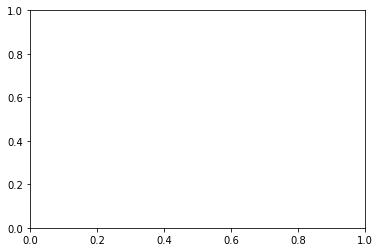

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()